In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set()

In [2]:
# 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2011-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0, axis=1).resample('M').last()

[*********************100%***********************]  9 of 9 completed


In [3]:
# 수익률 데이터
ret = data.pct_change().dropna()

# 공분산 행렬
cov_mat = ret.cov() * 12

In [4]:
# 공분산 행렬 고유값 분해

w, v = np.linalg.eig(cov_mat)

In [5]:
v

array([[ 3.80091301e-01, -1.05097230e-01,  1.36086269e-01,
        -3.20507193e-01,  3.24122279e-01, -2.62022311e-01,
        -7.40966592e-01,  2.20733981e-02,  3.34255585e-03],
       [ 5.22198826e-01,  7.71357292e-01, -2.26275124e-01,
         2.53631502e-01, -1.38350641e-02, -1.19407352e-01,
         4.32912486e-02,  6.38191606e-04, -2.15146411e-02],
       [ 3.80227409e-01,  6.74142915e-03,  1.61461905e-01,
        -4.20790431e-01,  3.55393931e-01,  6.05980867e-01,
         3.41105025e-01, -1.80487599e-01, -9.90003461e-02],
       [ 3.62210214e-01, -1.15879613e-01,  4.24303613e-02,
        -3.12311951e-01, -7.98033196e-01,  1.45002643e-01,
        -4.62965072e-02,  2.80132128e-01,  1.32425304e-01],
       [ 3.10931852e-01, -3.09139840e-01,  2.55921268e-01,
         5.01180567e-01,  7.08227607e-02,  5.45323668e-02,
         5.56066271e-02,  4.29704287e-01, -5.43460000e-01],
       [ 1.74518652e-01, -2.34392368e-01, -3.71822390e-01,
        -4.55958800e-02,  3.37946724e-01, -1.620049

In [6]:
w

array([0.2070711 , 0.03833072, 0.01945509, 0.01073447, 0.00251757,
       0.00712405, 0.00655906, 0.00468265, 0.00380344])

<Axes: >

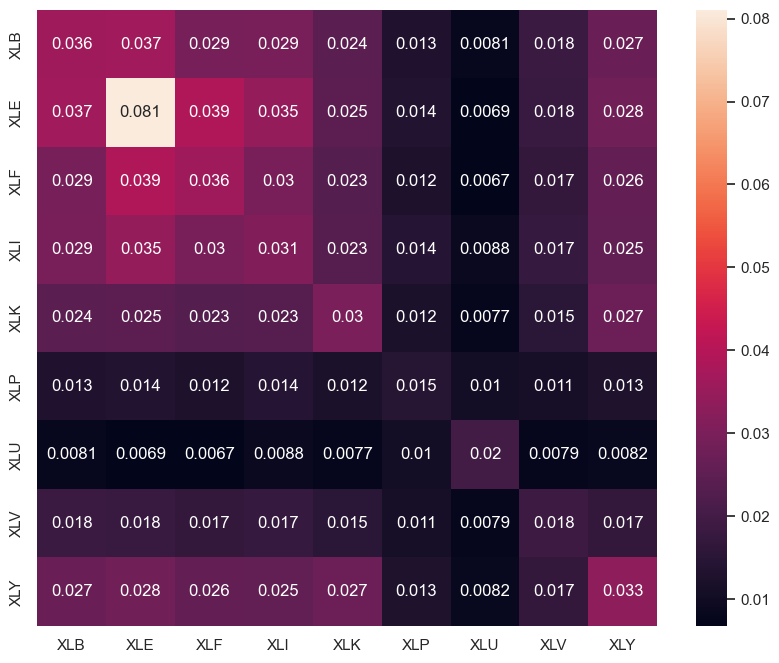

In [7]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(cov_mat, annot=True)

In [8]:
# 공분산 행렬의 역행렬 계산 함수
def inverse_cov_mat(cov_mat, eps=0.05, is_plot=True):

    # 고유값 분해
    w, v = np.linalg.eig(cov_mat)

    # 고유값이 음수라면 0으로 치환
    if np.where(w >= 0, True, False).sum() != len(w):
        w = np.where(w < 0, 0, w)
    
    # 유의미하지 않은 고유값을 0으로 처리
    weighted_w = w / np.sum(w)
    noise_free_w = np.where(weighted_w >= eps, w, 0)

    # 고유값과 상대적 가중치에 대한 그래프 생성
    if is_plot:
        plt.plot(np.sort(w)[::-1], marker='o', label='eigenvalue')
        plt.plot(np.sort(noise_free_w)[::-1], marker='x', label='updated eigenvalue')
        plt.legend()
        plt.show()
    
    # 역행렬 계산
    inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T
    new_cov_mat = v @ np.diag(noise_free_w) @ v.T

    return inv_mat, new_cov_mat

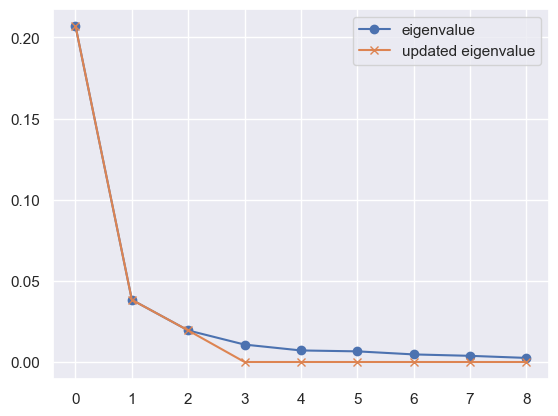

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_73483/787602226.py:23: RuntimeWarning: divide by zero encountered in divide
  inv_mat = v @ np.diag(np.where(noise_free_w != 0, 1 / noise_free_w, 0)) @ v.T


In [9]:
# 업데이트된 공분산 행렬
inv_mat, new_cov_mat = inverse_cov_mat(cov_mat)

<Axes: >

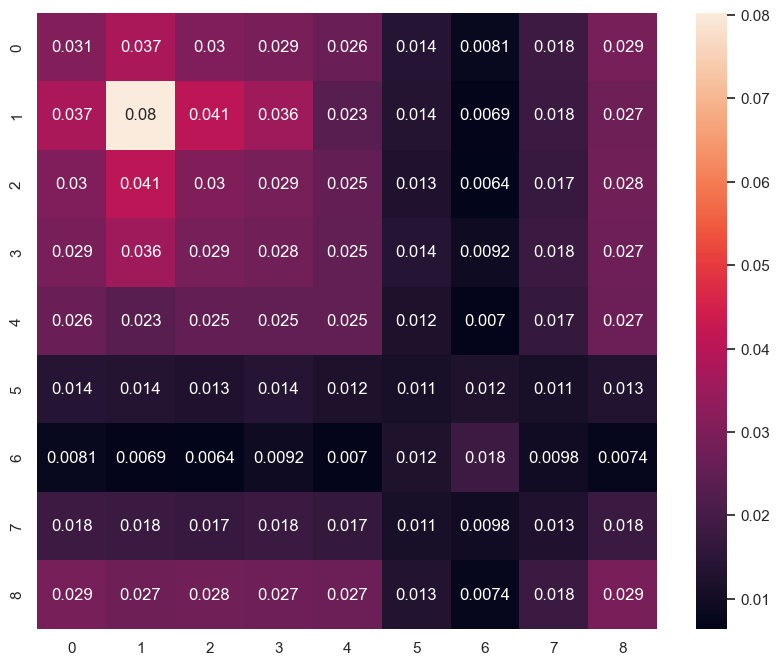

In [10]:
# 공분산 행렬 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(new_cov_mat, annot=True)